In [1]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

In [2]:
#I'd like  to use cufflinks because I really like the interactive charts, but unfortunately, I can't export them to github or excel
#you can change the companies if you'd like
warnings.filterwarnings('ignore')

#define the tickers and download the adjusted close prices
tickers = ['ELET3.SA', 'ENGI11.SA', 'EQTL3.SA', 'CPFE3.SA', 'CMIG4.SA', 'TAEE11.SA']
data = yf.download(tickers, period='10y')['Adj Close']

#normalizing data
df_normalized = (data / data.iloc[0]) * 100
df_normalized

[*********************100%%**********************]  6 of 6 completed


Ticker,CMIG4.SA,CPFE3.SA,ELET3.SA,ENGI11.SA,EQTL3.SA,TAEE11.SA
Date,,,,,,
2014-10-22,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-10-23,94.900659,93.695663,93.289682,100.000000,97.789129,96.084464
2014-10-24,100.397339,98.315211,99.508997,100.000000,97.789129,97.836173
2014-10-27,91.655655,92.663046,89.361680,103.174584,99.702345,94.538918
2014-10-28,95.496712,96.630431,92.798698,103.174584,104.081652,97.424040
...,...,...,...,...,...,...
2024-10-16,375.056072,286.634951,745.804350,500.277410,843.178679,505.873201
2024-10-17,373.374232,285.239711,746.000038,493.616076,839.838821,501.104930
2024-10-18,371.355979,284.280477,738.956753,491.696686,834.443734,504.283814


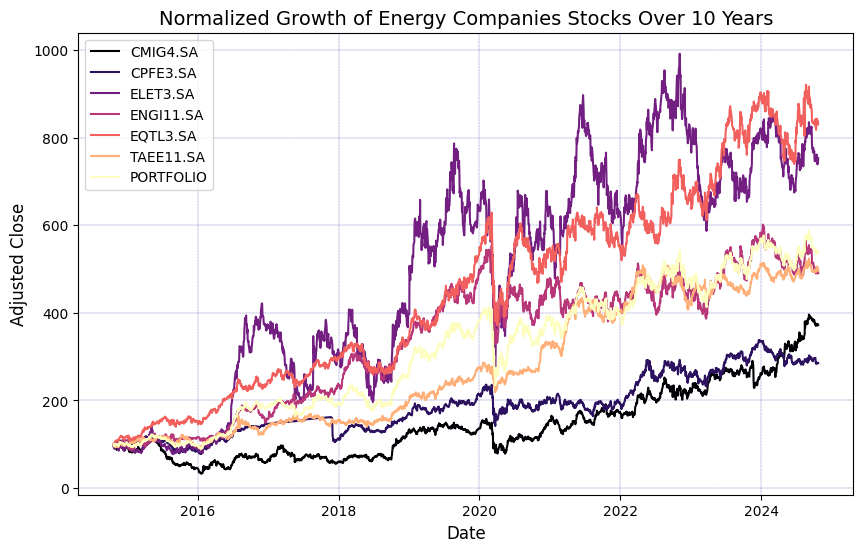

In [3]:
#calculate the portfolio value
weights = np.array([1/len(tickers)] * len(tickers))
portfolio_values = (df_normalized * weights).sum(axis=1)

#add portfolio values to the df for plotting
df_normalized['PORTFOLIO'] = portfolio_values

#plot the normalized growth graph with the portfolio consolidated line
plt.figure(figsize=(10,6))
colors = plt.cm.magma(np.linspace(0, 1, len(df_normalized.columns))) 
for i, column in enumerate(df_normalized.columns):
    plt.plot(df_normalized.index, df_normalized[column], label=column, color=colors[i])
plt.title('Normalized Growth of Energy Companies Stocks Over 10 Years', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close', fontsize=12)
plt.legend()
plt.grid(color = 'darkblue', linestyle = '--', linewidth = 0.2)
plt.show()

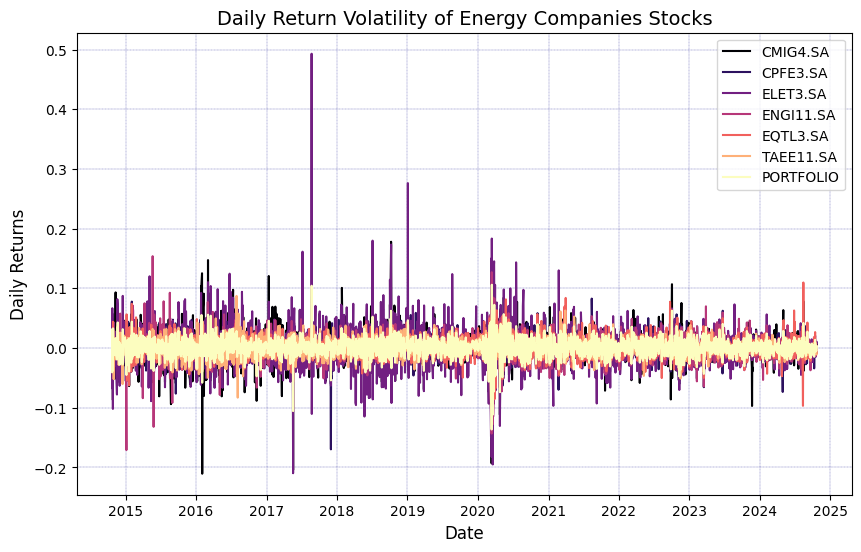

In [4]:
#calculate daily returns
daily_returns = data.pct_change().dropna()
portfolio_daily_returns = (daily_returns * weights).sum(axis=1)

#add portfolio daily returns to the DataFrame for plotting
daily_returns['PORTFOLIO'] = portfolio_daily_returns

#plot the daily returns graph with the portfolio consolidated line
plt.figure(figsize=(10,6))
colors = plt.cm.magma(np.linspace(0, 1, len(daily_returns.columns))) 
for i, column in enumerate(daily_returns.columns):
    plt.plot(daily_returns.index, daily_returns[column], label=column, color=colors[i])
plt.title('Daily Return Volatility of Energy Companies Stocks', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns', fontsize=12)
plt.grid(color = 'darkblue', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()

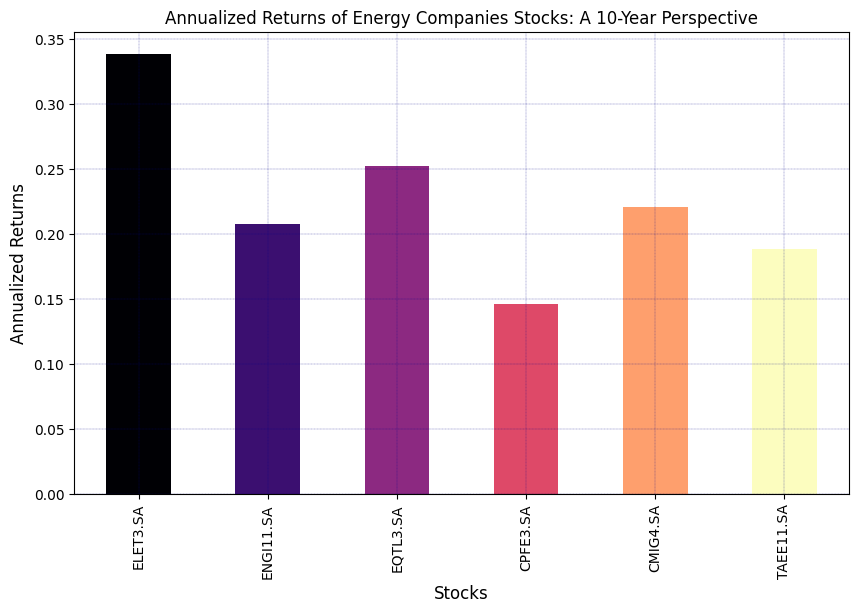

In [5]:
#annual returns
annual_returns = daily_returns[tickers].mean() * 252

#plot the annualized returns bar chart
plt.figure(figsize=(10,6))
annual_returns.plot(kind='bar', color=plt.cm.magma(np.linspace(0, 1, len(tickers))), title='Annualized Returns of Energy Companies Stocks: A 10-Year Perspective')
plt.xlabel('Stocks', fontsize=12)
plt.ylabel('Annualized Returns', fontsize=12)
plt.grid(color = 'darkblue', linestyle = '--', linewidth = 0.2)
plt.show()

In [6]:
#covariance matrix
cov_daily = daily_returns[tickers].cov()
cov_annual = cov_daily * 252

#calculate the portfolio return and volatility with equal weights
portfolio_return = np.dot(weights, annual_returns)
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

#calculate the sharpe ratio
risk_free_rate = 0.0417
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

print(f"Portfolio Return: {portfolio_return * 100:.2f}%")
print(f"Portfolio Standard Deviation: {portfolio_std_dev * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Portfolio Return: 22.54%
Portfolio Standard Deviation: 24.76%
Sharpe Ratio: 0.74


Portfolio with the maximum Sharpe ratio:
Return              0.232263
Volatility          0.219032
Sharpe Ratio        0.870026
ELET3.SA Weight     0.071575
ENGI11.SA Weight    0.134774
EQTL3.SA Weight     0.489381
CPFE3.SA Weight     0.011213
CMIG4.SA Weight     0.001939
TAEE11.SA Weight    0.291118
Name: 11365, dtype: float64

Portfolio with the minimum volatility:
Return              0.196218
Volatility          0.196922
Sharpe Ratio        0.784664
ELET3.SA Weight     0.006853
ENGI11.SA Weight    0.186826
EQTL3.SA Weight     0.138350
CPFE3.SA Weight     0.141356
CMIG4.SA Weight     0.020930
TAEE11.SA Weight    0.505686
Name: 147788, dtype: float64


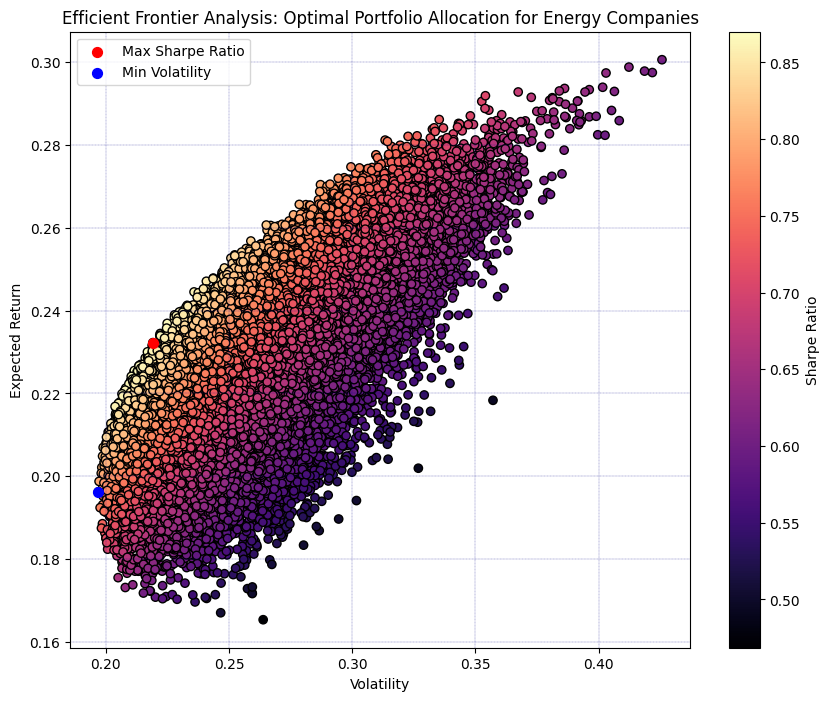

In [7]:
#empty lists for random portfolios
portfolio_return = []
weights_list = []
portfolio_volatility = []
sharpe_ratio = []
num_tickers = len(tickers)
num_portfolios = 200000
np.random.seed(101)

for each_portfolio in range(num_portfolios):
    #random weights to each stock in the portfolio
    weight = np.random.random(num_tickers)
    weight /= np.sum(weight)
    #calculate the portfolio return
    returns = np.dot(weight, annual_returns)
    #calculate the portfolio volatility
    volatility = np.sqrt(np.dot(weight.T, np.dot(cov_annual, weight)))
    #calculate the SR
    sharpe = (returns - risk_free_rate) / volatility
    #append each portfolio to the previously created lists
    sharpe_ratio.append(sharpe)
    portfolio_return.append(returns)
    portfolio_volatility.append(volatility)
    weights_list.append(weight)

portfolio = {
    'Return': portfolio_return,
    'Volatility': portfolio_volatility,
    'Sharpe Ratio': sharpe_ratio
}

for count, ticker in enumerate(tickers):
    portfolio[ticker + ' Weight'] = [weight[count] for weight in weights_list]

#transform the dictionary into a df
df_portfolios = pd.DataFrame(portfolio)

#name the columns of the new df
columns = ['Return', 'Volatility', 'Sharpe Ratio'] + [ticker + ' Weight' for ticker in tickers]
df_portfolios = df_portfolios[columns]

#identify the portfolio with the maximum SR and volatility
max_sharpe_port = df_portfolios.loc[df_portfolios['Sharpe Ratio'].idxmax()]
min_vol_port = df_portfolios.loc[df_portfolios['Volatility'].idxmin()]

print("Portfolio with the maximum Sharpe ratio:")
print(max_sharpe_port)

print("\nPortfolio with the minimum volatility:")
print(min_vol_port)

#plot the efficient frontier
plt.figure(figsize=(10,8))
scatter = plt.scatter(df_portfolios['Volatility'], df_portfolios['Return'], c=df_portfolios['Sharpe Ratio'], cmap='magma', edgecolors='black')
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Return'], color='red', marker='.', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_port['Volatility'], min_vol_port['Return'], color='blue', marker='.', s=200, label='Min Volatility')
plt.colorbar(scatter, label='Sharpe Ratio') 
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier Analysis: Optimal Portfolio Allocation for Energy Companies')
plt.grid(color = 'darkblue', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()